In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('customer_activity.csv')
data_Sel=df[(df.Avg_Monetary_Value <=200)  & (df.Avg_Monetary_Value>3)]
data_Sel.drop(columns=['Recency_scaled','No_of_Visits_scaled','Avg_Monetary_Value_scaled'],inplace=True)
data_Sel

C:\Users\chack\AppData\Local\Temp\ipykernel_18160\3383078564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Sel.drop(columns=['Recency_scaled','No_of_Visits_scaled','Avg_Monetary_Value_scaled'],inplace=True)


,Customer_ID,No_of_Visits,Avg_Monetary_Value,Last_visit_date,Recency
0,0017XWZ446JECNYPR2FSZ401VM,3,128.67,2024-05-16,107
1,00EW3VHW4YCGN8C5ABBQ38Y2D8,1,102.00,2024-06-24,68
2,00MBVFF9C1NTTKPQGJXVR50BFW,1,67.00,2023-07-22,406
3,00W1SBWAA56Y7BH8EJSYPCBZVM,1,74.50,2022-11-19,651
4,0145EFYZ838DHVFZTTPFT1PCM4,1,159.00,2023-06-01,457
...,...,...,...,...,...
7578,ZZHDFMP5X4CR75VWBSEB3SQKNW,1,94.00,2023-11-05,300
7579,ZZJR09NVC5QYA3SCS45F2TAKTC,3,145.67,2023-12-30,245
7580,ZZKKABRE2VD58JMFZ1NE14WXX0,1,75.00,2024-07-22,40
7581,ZZNBKRNCVY6D99FY1VMS05X88M,1,140.00,2023-07-15,413


In [3]:
df.Recency.max()

749

In [4]:
data_Sel = data_Sel[data_Sel['No_of_Visits'] <= 10]

In [5]:
data_Sel.No_of_Visits.max()

10

In [6]:
data_Sel = data_Sel[data_Sel.Recency < 500]

<h1> BoxPlot Distribution

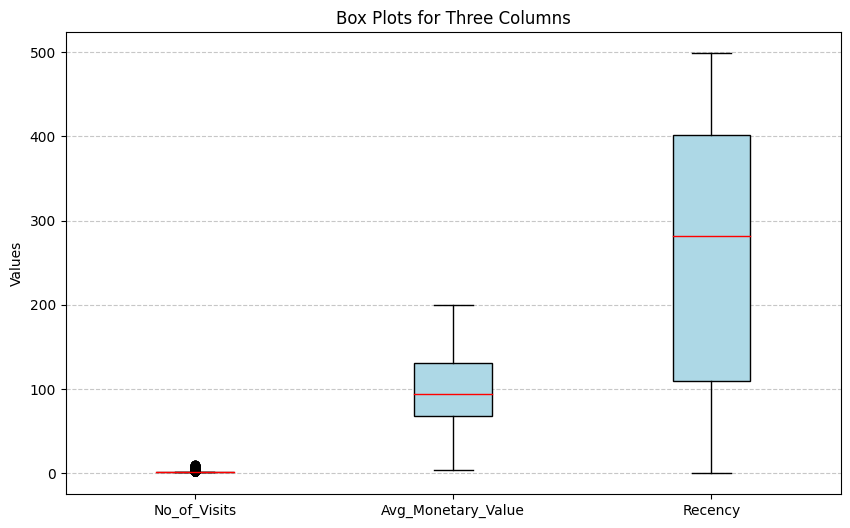

In [7]:
# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot([data_Sel['No_of_Visits'], data_Sel['Avg_Monetary_Value'], data_Sel['Recency']], patch_artist=True,
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='red'))

# Customize the plot
plt.title('Box Plots for Three Columns')
plt.ylabel('Values')
plt.xticks([1, 2, 3],['No_of_Visits','Avg_Monetary_Value','Recency'])  # Use column names as labels
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [8]:
'''Q1 = selected['Avg_Monetary_Value'].quantile(0.25)
Q3 =selected['Avg_Monetary_Value'].quantile(0.25)
IQR = Q3 - Q1
monetary_outliers = selected [~(selected['Avg_Monetary_Value'] > Q3 + 1.5 * IQR)]
monetary_outliers.No_of_Visits.unique()'''

"Q1 = selected['Avg_Monetary_Value'].quantile(0.25)\nQ3 =selected['Avg_Monetary_Value'].quantile(0.25)\nIQR = Q3 - Q1\nmonetary_outliers = selected [~(selected['Avg_Monetary_Value'] > Q3 + 1.5 * IQR)]\nmonetary_outliers.No_of_Visits.unique()"

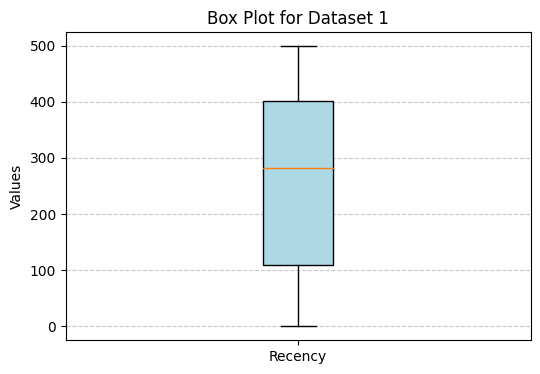

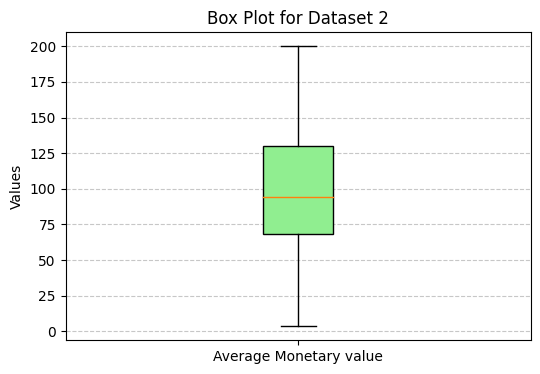

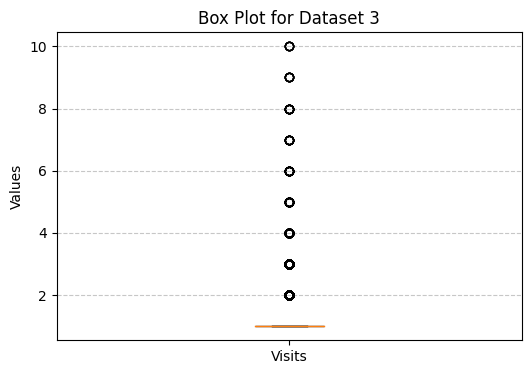

In [9]:
# First box plot
plt.figure(figsize=(6, 4))
plt.boxplot(data_Sel.Recency, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot for Dataset 1')
plt.ylabel('Values')
plt.xticks([1], ['Recency'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Second box plot
plt.figure(figsize=(6, 4))
plt.boxplot(data_Sel.Avg_Monetary_Value, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Box Plot for Dataset 2')
plt.ylabel('Values')
plt.xticks([1], ['Average Monetary value'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Third box plot
plt.figure(figsize=(6, 4))
plt.boxplot(data_Sel.No_of_Visits, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.title('Box Plot for Dataset 3')
plt.ylabel('Values')
plt.xticks([1], ['Visits'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
data_Sel.groupby('No_of_Visits').count()

,Customer_ID,Avg_Monetary_Value,Last_visit_date,Recency
No_of_Visits,,,,
1,3682,3682,3682,3682
2,521,521,521,521
3,162,162,162,162
4,69,69,69,69
5,26,26,26,26
6,14,14,14,14
7,9,9,9,9
8,10,10,10,10
9,6,6,6,6


<h1> Model Ready Dataset

In [11]:
scaler=StandardScaler()
data_Sel['Recency_scaled'] = scaler.fit_transform(data_Sel[['Recency']])
data_Sel['No_of_Visits_scaled'] = scaler.fit_transform(data_Sel[['No_of_Visits']])
#data_Sel['Avg_Monetary_Value_scaled'] = scaler.fit_transform(data_Sel[['Avg_Monetary_Value']])

In [13]:
data=data_Sel.iloc[:,1:]
data.drop(columns=['Last_visit_date','No_of_Visits','Avg_Monetary_Value','Recency'],inplace=True)
data

,Recency_scaled,No_of_Visits_scaled
0,-0.989068,1.853972
1,-1.241129,-0.353639
2,0.943396,-0.353639
4,1.273013,-0.353639
6,-0.155329,-0.353639
...,...,...
7577,-0.976142,-0.353639
7578,0.258308,-0.353639
7579,-0.097162,1.853972
7580,-1.422095,-0.353639


<h1> Kmeans Clustering

In [26]:
data.Recency_scaled.max()

1.544463283026105

In [28]:
data.Recency_scaled.min()

-1.680618664624506

In [27]:
data.No_of_Visits_scaled.max()

9.580614251352674

In [29]:
data.No_of_Visits_scaled.min()

-0.3536394332668742

In [31]:
initial_clusters=np.array([[1.544463283026105,9.580614251352674],[-1.680618664624506,-0.3536394332668742],[-1.680618664624506,9.580614251352674],[1.544463283026105,-0.3536394332668742]])

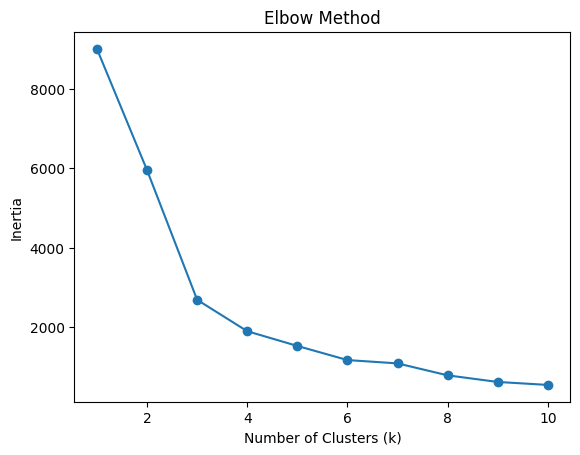

In [15]:
k_range = range(1, 11)
inertias = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

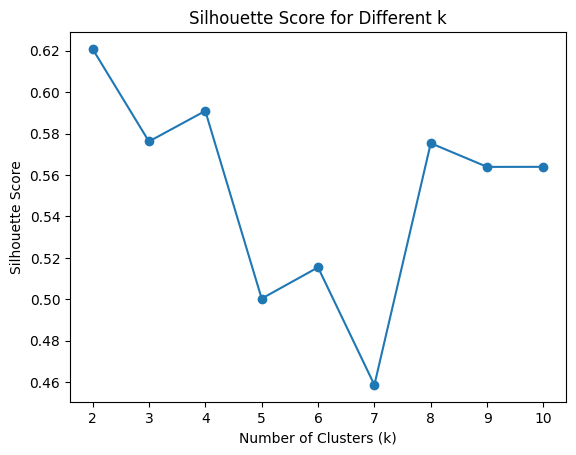

In [16]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Try different values of k and calculate the silhouette score
silhouette_scores = []

for k in range(2, 11):  # k should be >= 2 for silhouette score
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    score = silhouette_score(data, cluster_labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.show()

In [33]:
# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=4,init=initial_clusters,n_init=1,random_state=42)  # Specify the number of clusters (e.g., 2)
kmeans.fit(data)

# Step 3: Get the cluster labels and centroids
labels = kmeans.labels_   # Cluster labels for each data point
centroids = kmeans.cluster_centers_

In [34]:
data_Sel['Cluster']=labels
data_Sel.groupby('Cluster')['Cluster'].count()

Cluster
0      44
1    1936
2      95
3    2429
Name: Cluster, dtype: int64

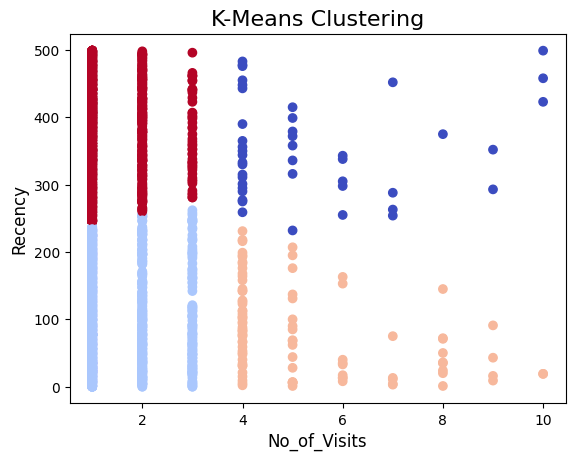

In [36]:
plt.scatter(data_Sel.No_of_Visits, data_Sel.Recency, c=data_Sel.Cluster, cmap='coolwarm')  # Plot the points
plt.title('K-Means Clustering', fontsize=16)  # Optional: increase font size for clarity
plt.xlabel('No_of_Visits', fontsize=12)
plt.ylabel('Recency', fontsize=12)
plt.show()

In [37]:
data_Sel['Recency'].min()

0

In [38]:
data_Sel['No_of_Visits'].max()

10

<h1> Dbscan Algorithm


In [39]:
from sklearn.cluster import DBSCAN


# Assuming 'data' is your dataset (e.g., after PCA reduction)

# 1. Fit DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=10)  # You can adjust 'eps' and 'min_samples'
labels = dbscan.fit_predict(data_pca)

# 2. Evaluate with Silhouette Score (optional, only if you have more than one cluster)
# Silhouette score is not meaningful if you have a lot of noise points (labeled as -1)
if len(set(labels)) > 1:  # Check if there are more than 1 cluster
    silhouette_avg = silhouette_score(data, labels)
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("Not enough clusters to calculate Silhouette Score")

# Assuming 'data' is a Pandas DataFrame, and 'labels' contains the cluster labels
# Access the first and second columns using .iloc
dbscan = DBSCAN(eps=0.4, min_samples=10)  # Tune eps and min_samples as needed
labels = dbscan.fit_predict(data_pca)

# Step 3: Visualize the DBSCAN clustering result
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
plt.title("DBSCAN Clustering with PCA-transformed Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.show()

NameError: name 'data_pca' is not defined

In [ ]:
data_Sel['Cluster_DB']=labels
data_Sel.groupby('Cluster')['Cluster'].count()

Cluster
0     928
1     109
2    1651
3    1103
4      30
5     318
6     365
Name: Cluster, dtype: int64

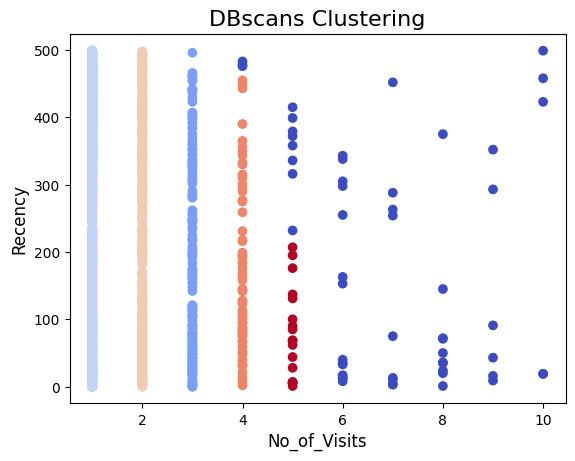

In [ ]:
plt.scatter(data_Sel.No_of_Visits, data_Sel.Recency, c=data_Sel.Cluster_DB, cmap='coolwarm')  # Plot the points
plt.title('DBscans Clustering', fontsize=16)  # Optional: increase font size for clarity
plt.xlabel('No_of_Visits', fontsize=12)
plt.ylabel('Recency', fontsize=12)
plt.show()

<h1> Agglomerative clustering (Hierarchical)

In [ ]:
from sklearn.neighbors import NearestNeighbors

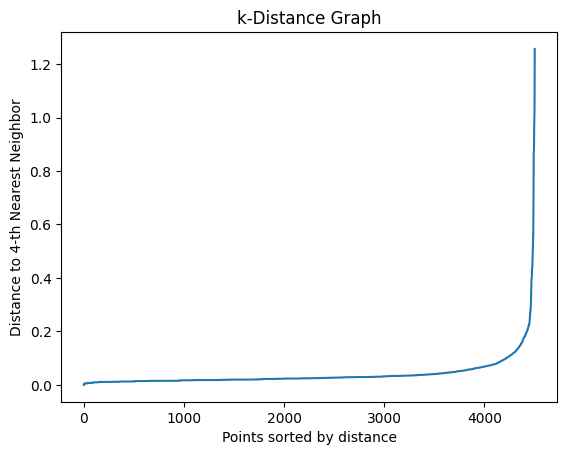

In [ ]:
# Set min_samples (based on dimensionality of your data, here we set it to 4 for 2D)
min_samples = 4

# Compute nearest neighbors
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)

# Sort distances (the last column contains the distance to the 4th nearest neighbor)
distances = np.sort(distances[:, -1], axis=0)

# Plot the k-distance graph
plt.plot(distances)
plt.title("k-Distance Graph")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"Distance to {min_samples}-th Nearest Neighbor")
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

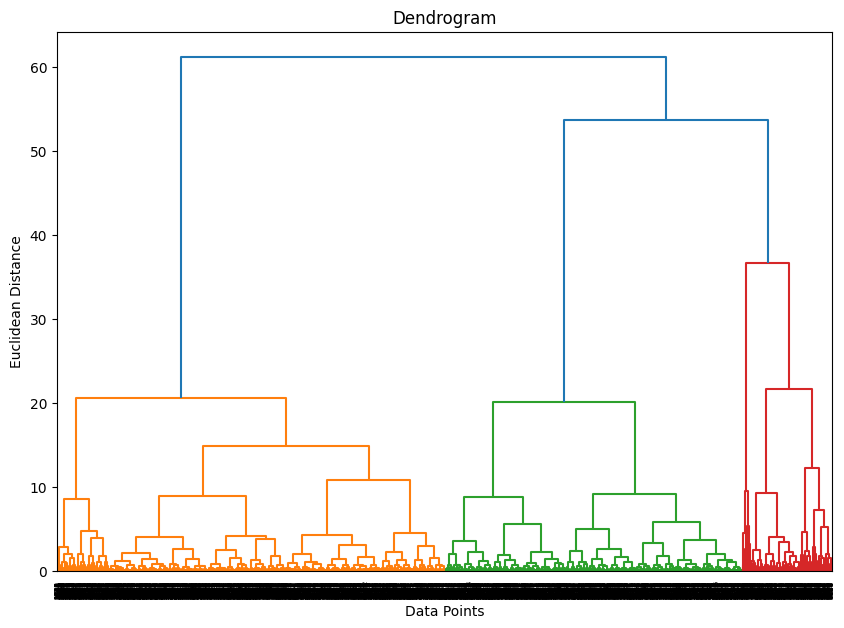

In [ ]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=40)  # Set n_clusters=None to get the full hierarchy
model.fit(data)

# Create the linkage matrix
linked = linkage(data, 'ward')

# Plot the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [40]:
data_Sel

,Customer_ID,No_of_Visits,Avg_Monetary_Value,Last_visit_date,Recency,Recency_scaled,No_of_Visits_scaled,Cluster
0,0017XWZ446JECNYPR2FSZ401VM,3,128.67,2024-05-16,107,-0.989068,1.853972,1
1,00EW3VHW4YCGN8C5ABBQ38Y2D8,1,102.00,2024-06-24,68,-1.241129,-0.353639,1
2,00MBVFF9C1NTTKPQGJXVR50BFW,1,67.00,2023-07-22,406,0.943396,-0.353639,3
4,0145EFYZ838DHVFZTTPFT1PCM4,1,159.00,2023-06-01,457,1.273013,-0.353639,3
6,017PR1V3WRFTKR57QF4A9YMW4R,1,116.00,2024-01-08,236,-0.155329,-0.353639,1
...,...,...,...,...,...,...,...,...
7577,ZZDVMBQJXD5D9QYX76QZDR71FR,1,86.00,2024-05-14,109,-0.976142,-0.353639,1
7578,ZZHDFMP5X4CR75VWBSEB3SQKNW,1,94.00,2023-11-05,300,0.258308,-0.353639,3
7579,ZZJR09NVC5QYA3SCS45F2TAKTC,3,145.67,2023-12-30,245,-0.097162,1.853972,1
7580,ZZKKABRE2VD58JMFZ1NE14WXX0,1,75.00,2024-07-22,40,-1.422095,-0.353639,1


In [41]:
data_Sel.Cluster.unique()

array([1, 3, 2, 0])

In [42]:
data_Sel.to_csv("Cluster_dataset.csv",index=False)